# **Waste Material Segregation for Improving Waste Management**

## **Objective**

The objective of this project is to implement an effective waste material segregation system using convolutional neural networks (CNNs) that categorises waste into distinct groups. This process enhances recycling efficiency, minimises environmental pollution, and promotes sustainable waste management practices.

The key goals are:

* Accurately classify waste materials into categories like cardboard, glass, paper, and plastic.
* Improve waste segregation efficiency to support recycling and reduce landfill waste.
* Understand the properties of different waste materials to optimise sorting methods for sustainability.

## **Data Understanding**

The Dataset consists of images of some common waste materials.

1. Food Waste
2. Metal
3. Paper
4. Plastic
5. Other
6. Cardboard
7. Glass


**Data Description**

* The dataset consists of multiple folders, each representing a specific class, such as `Cardboard`, `Food_Waste`, and `Metal`.
* Within each folder, there are images of objects that belong to that category.
* However, these items are not further subcategorised. <br> For instance, the `Food_Waste` folder may contain images of items like coffee grounds, teabags, and fruit peels, without explicitly stating that they are actually coffee grounds or teabags.

## **1. Load the data**

Load and unzip the dataset zip file.

**Import Necessary Libraries**

In [3]:
# Recommended versions:

# numpy version: 1.26.4
# pandas version: 2.2.2
# seaborn version: 0.13.2
# matplotlib version: 3.10.0
# PIL version: 11.1.0
# tensorflow version: 2.18.0
# keras version: 3.8.0
# sklearn version: 1.6.1

In [4]:
# Import essential libraries
# Import essential libraries

import zipfile
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import tensorflow as tf
from tensorflow import keras
from PIL import Image
from glob import glob
from sklearn.model_selection import train_test_split
import keras
#from tf.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from PIL import Image
import seaborn as sns
import tensorflow as tf
from tensorflow import keras




In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Load the dataset.

In [6]:
import zipfile
import os

with zipfile.ZipFile('/content/drive/MyDrive/data.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/')



In [7]:
data_directory='/content/data'

## **2. Data Preparation** <font color=red> [25 marks] </font><br>


### **2.1 Load and Preprocess Images** <font color=red> [8 marks] </font><br>

Let us create a function to load the images first. We can then directly use this function while loading images of the different categories to load and crop them in a single step.

#### **2.1.1** <font color=red> [3 marks] </font><br>
Create a function to load the images.

In [8]:
# Create a function to load the raw images
#filepath
#filepath='/content/data/Cardboard/file_2.png'

image_size=(128,128)
def load_raw_images(filepath,image_size):
    img=Image.open(filepath)
    img =img.convert("RGB")
    img= img.resize(image_size)
    #print(img)
    return img
#load_raw_images(filepath)

#### **2.1.2** <font color=red> [5 marks] </font><br>
Load images and labels.

Load the images from the dataset directory. Labels of images are present in the subdirectories.

Verify if the images and labels are loaded correctly.

In [9]:
image_array=[]
label_array=[]
image_size=(128,128)


for label in os.listdir(data_directory):
    label_dir = os.path.join(data_directory, label)
    #label_dir = os.path.basename(os.path.dirname(data_directory))
    for file in os.listdir(label_dir):
      file_path=os.path.join(label_dir,file)
      if os.path.isfile(file_path):
        img=load_raw_images(file_path,image_size)
        image_array.append(img)
        label_array.append(label)


print(image_array)
print(label_array)

[<PIL.Image.Image image mode=RGB size=128x128 at 0x7A41AC728B50>, <PIL.Image.Image image mode=RGB size=128x128 at 0x7A41AC24F5D0>, <PIL.Image.Image image mode=RGB size=128x128 at 0x7A41AC856B10>, <PIL.Image.Image image mode=RGB size=128x128 at 0x7A41AC24D690>, <PIL.Image.Image image mode=RGB size=128x128 at 0x7A41AC2A4DD0>, <PIL.Image.Image image mode=RGB size=128x128 at 0x7A41AC2A5190>, <PIL.Image.Image image mode=RGB size=128x128 at 0x7A41B9E05350>, <PIL.Image.Image image mode=RGB size=128x128 at 0x7A41AC2A51D0>, <PIL.Image.Image image mode=RGB size=128x128 at 0x7A41AC2A5650>, <PIL.Image.Image image mode=RGB size=128x128 at 0x7A41AC24D810>, <PIL.Image.Image image mode=RGB size=128x128 at 0x7A41AC2A56D0>, <PIL.Image.Image image mode=RGB size=128x128 at 0x7A41AC2A5950>, <PIL.Image.Image image mode=RGB size=128x128 at 0x7A41AC2A5B10>, <PIL.Image.Image image mode=RGB size=128x128 at 0x7A41AC2A5CD0>, <PIL.Image.Image image mode=RGB size=128x128 at 0x7A41AC2A5E90>, <PIL.Image.Image image m

image array and label arrays

iterate over data directory and find out the labels
        label_dir = os.path.basename(os.path.dirname(filepath))
        iterate over files present in label_dir    
         you will read that file
         load_imag     

In [10]:

# for paths in ima
X,y=image_array,label_array
X = np.array(X)
y = np.array(y).flatten()

print(f"Total images: {X.shape[0]}, Image shape: {X.shape[1:]}")
print(f"Sample labels: {np.unique(y)}")



Total images: 7625, Image shape: (128, 128, 3)
Sample labels: ['Cardboard' 'Food_Waste' 'Glass' 'Metal' 'Other' 'Paper' 'Plastic']


Perform any operations, if needed, on the images and labels to get them into the desired format.

### **2.2 Data Visualisation** <font color=red> [9 marks] </font><br>

#### **2.2.1** <font color=red> [3 marks] </font><br>
Create a bar plot to display the class distribution

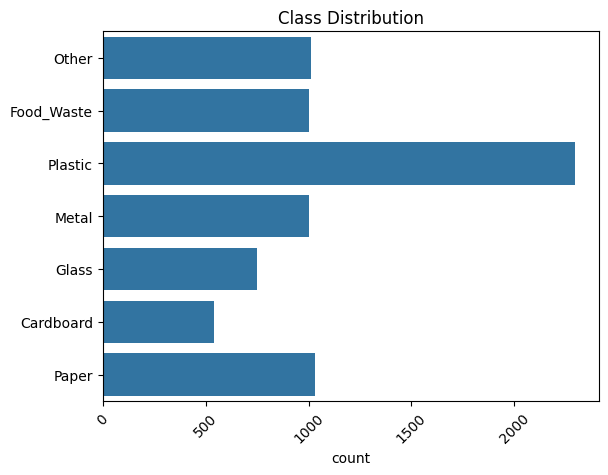

In [11]:
# Visualise Data Distribution
sns.countplot(y)
plt.title("Class Distribution")
plt.xticks(rotation=45)
plt.show()

#### **2.2.2** <font color=red> [3 marks] </font><br>
Visualise some sample images

uint8 (7625, 128, 128, 3)


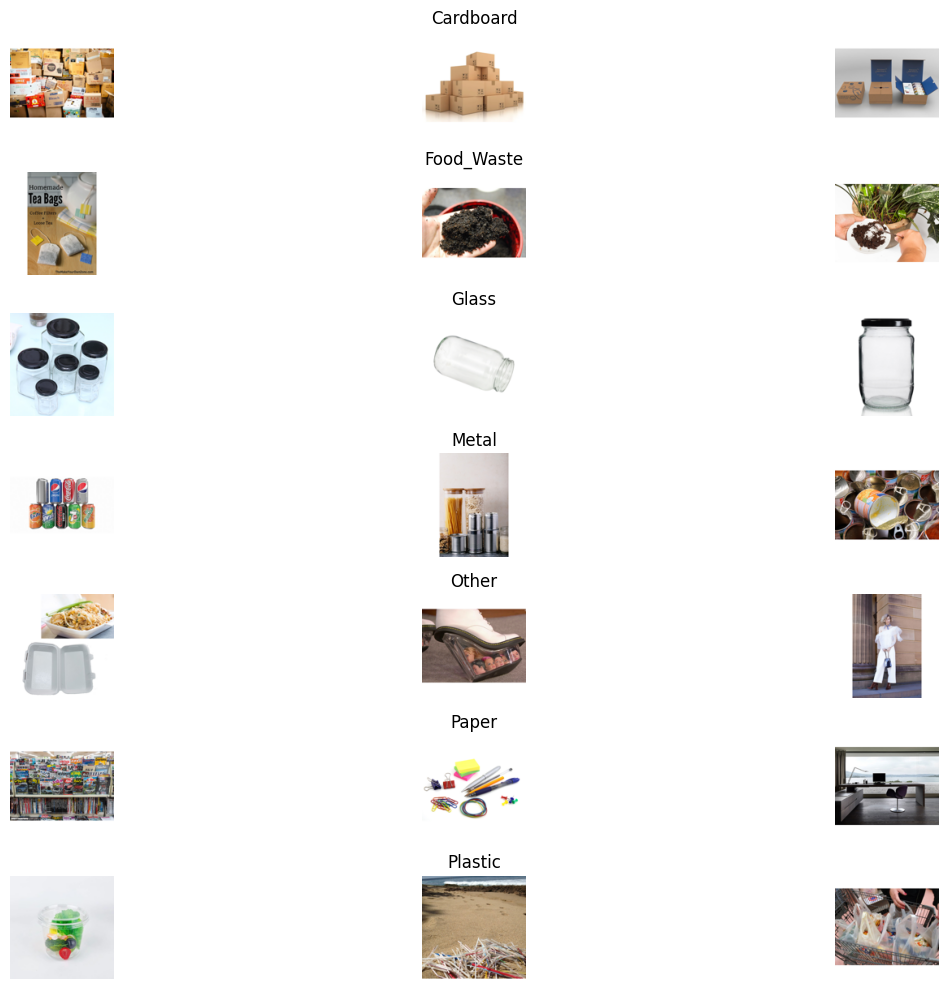

In [12]:
# Visualise Sample Images (across different labels)
# Show sample images from each class
# Convert to a NumPy array
print(X.dtype, X.shape)
#X = np.array([np.array(img, dtype=np.uint8) for img in X])

def show_image(X, y, class_names, samples_per_class=3):
    plt.figure(figsize=(15, 10))
    for idx, class_name in enumerate(class_names):
        class_indices = np.where(y == class_name)[0]
        selected_indices = np.random.choice(class_indices, samples_per_class, replace=False)
        for i, img_idx in enumerate(selected_indices):
            plt_idx = idx * samples_per_class + i + 1
            plt.subplot(len(class_names), samples_per_class, plt_idx)
            plt.imshow(X[img_idx])
            plt.axis('off')
            if i == 1:
                plt.title(class_name)
    plt.tight_layout()
    plt.show()

class_names = sorted(np.unique(label_array))
show_image(X, y, class_names)



#### **2.2.3** <font color=red> [3 marks] </font><br>
Based on the smallest and largest image dimensions, resize the images.

In [13]:
# Find the smallest and largest image dimensions from the data set

min_width=0
min_height=0
max_width=0
max_height=0
for image in image_array:
    width, height = image.size
    min_width = min(min_width, width)
    min_height = min(min_height, height)
    max_width = max(max_width, width)
    max_height = max(max_height, height)

print(f"Min dimensions: ({min_width}, {min_height})")
print(f"Max dimensions: ({max_width}, {max_height})")

Min dimensions: (0, 0)
Max dimensions: (128, 128)


In [36]:
# Resize the image dimensions

# Already resized during image loading to 128x128
print("All images resized to:", image_size)

All images resized to: (128, 128)


### **2.3 Encoding the classes** <font color=red> [3 marks] </font><br>

There are seven classes present in the data.

We have extracted the images and their labels, and visualised their distribution. Now, we need to perform encoding on the labels. Encode the labels suitably.

####**2.3.1** <font color=red> [3 marks] </font><br>
Encode the target class labels.

In [14]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Encode the labels suitably
label_encoder = LabelEncoder()
encoded_labels= label_encoder.fit_transform(y)
y_categorical = to_categorical(encoded_labels)



### **2.4 Data Splitting** <font color=red> [5 marks] </font><br>

#### **2.4.1** <font color=red> [5 marks] </font><br>
Split the dataset into training and validation sets

In [15]:
# Assign specified parts of the dataset to train and validation sets

X_train, X_val,y_train, y_val,= train_test_split(image_array, y_categorical, test_size=0.2, random_state=42, stratify=encoded_labels)

# Convert the image data to numpy arrays
X_train = np.array([np.array(img) for img in X_train])
X_val = np.array(X_val)
X_train=X_train.astype('float32')/255.0
X_val=X_val.astype('float32')/255.0
print("Training set size:", X_train.shape[0],X_train.shape)
print("Validation set size:", X_val.shape[0],X_val.shape)




Training set size: 6100 (6100, 128, 128, 3)
Validation set size: 1525 (1525, 128, 128, 3)


## **3. Model Building and Evaluation** <font color=red> [20 marks] </font><br>

### **3.1 Model building and training** <font color=red> [15 marks] </font><br>

#### **3.1.1** <font color=red> [10 marks] </font><br>
Build and compile the model. Use 3 convolutional layers. Add suitable normalisation, dropout, and fully connected layers to the model.

Test out different configurations and report the results in conclusions.

In [19]:
# Build and compile the model


# Build and compile the model
from tensorflow.keras import models
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Dropout, Flatten, Dense



# configurations =[

#     {'name':'Config 1', 'filters': [32,64,128], 'kernel_size': (3, 3), 'pool_size': (2, 2), 'activation': 'relu', 'dropout_rate': 0.2, 'conv_layers':3},
#     {'name':'Config 2', 'filters': [32,64,64,128],'kernel_size': (3, 3), 'pool_size': (2, 2), 'activation': 'relu', 'dropout_rate': 0.3,'conv_layers':3},
#     {'name':'Config 3', 'filters': [32,32,64,128,128], 'kernel_size': (3, 3), 'pool_size': (2, 2), 'activation': 'relu', 'dropout_rate': 0.4,'conv_layers':3},
# ]

# # Create a function to build the model

# def create_model(config):
#     model = Sequential()
#     for i in range(config['conv_layers']):
#         model.add(Conv2D(config['filters'][i], config['kernel_size'], activation=config['activation'], input_shape=(max_height, max_width, 3)))
#         model.add(BatchNormalization())
#         model.add(MaxPooling2D(pool_size=config['pool_size']))
#     model.add(Flatten())
#     model.add(Dense(128, activation='relu'))
#     model.add(Dropout(config['dropout_rate']))
#     model.add(Dense(len(set(encoded_labels)), activation='softmax'))
#     return model


#

model = models.Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D(2, 2))
model.add(BatchNormalization())

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(len(np.unique(encoded_labels)), activation='softmax'))



#### **3.1.2** <font color=red> [5 marks] </font><br>
Train the model.

Use appropriate metrics and callbacks as needed.

In [21]:
#Training
epoch = 10
batch_size = 32
history_dict = {}
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()
callbacks=[EarlyStopping(monitor='val_loss',patience=5,restore_best_weights=True),
           ModelCheckpoint("best_model.h5",save_best_only=True)
           ]
history = model.fit(
    X_train, y_train,
    epochs=epoch,
    batch_size=batch_size,
    validation_data=(X_val, y_val),
    callbacks=callbacks
    )

# epochs = 10
# batch_size = 32
# history_dict = {}
# callbacks=[EarlyStopping(monitor='val_loss',patience=5,restore_best_weights=True),
#           ModelCheckpoint("best_model.h5",save_best_only=True)]
# for config in configurations:
#     model = create_model(config)
#     model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
#     history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_val, y_val),callbacks=callbacks)
#     history_dict[config['name']] = history.history
#     loss, accuracy = model.evaluate(X_val, y_val)
#     print(f"Validation Loss: {loss* 100:.2f}%, Validation Accuracy: {accuracy* 100:.2f}%")


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 63, 63, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 61, 61, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 28, 28, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │       802,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 832,103 (3.17 MB)

 Trainable params: 832,039 (3.17 MB)

 Non-trainable params: 64 (256.00 B)

Epoch 1/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.2315 - loss: 2.0012

191/191 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.2318 - loss: 2.0001 - val_accuracy: 0.3200 - val_loss: 1.7805
Epoch 2/10
190/191 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.3973 - loss: 1.5573

191/191 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.3976 - loss: 1.5567 - val_accuracy: 0.4511 - val_loss: 1.5700
Epoch 3/10
188/191 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4846 - loss: 1.3746

191/191 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.4850 - loss: 1.3741 - val_accuracy: 0.4774 - val_loss: 1.4278
Epoch 4/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.5560 - loss: 1.2080 - val_accuracy: 0.4551 - val_loss: 1.5015
Epoch 5/10
187/191 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6182 - loss: 1.0423

191/191 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.6184 - loss: 1.0423 - val_accuracy: 0.5384 - val_loss: 1.2907
Epoch 6/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.6789 - loss: 0.8873 - val_accuracy: 0.5246 - val_loss: 1.5012
Epoch 7/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.7463 - loss: 0.7358 - val_accuracy: 0.5370 - val_loss: 1.3273
Epoch 8/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.7811 - loss: 0.6310 - val_accuracy: 0.5180 - val_loss: 1.5543
Epoch 9/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.8088 - loss: 0.5434 - val_accuracy: 0.5338 - val_loss: 1.6594
Epoch 10/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.8284 - loss: 0.4821 - val_accuracy: 0.6046 - val_loss: 1.3668


### **3.2 Model Testing and Evaluation** <font color=red> [5 marks] </font><br>

#### **3.2.1** <font color=red> [5 marks] </font><br>
Evaluate the model on test dataset. Derive appropriate metrics.

48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5194 - loss: 1.3305
Validation Loss: 129.07%
Validation Accuracy: 53.84%


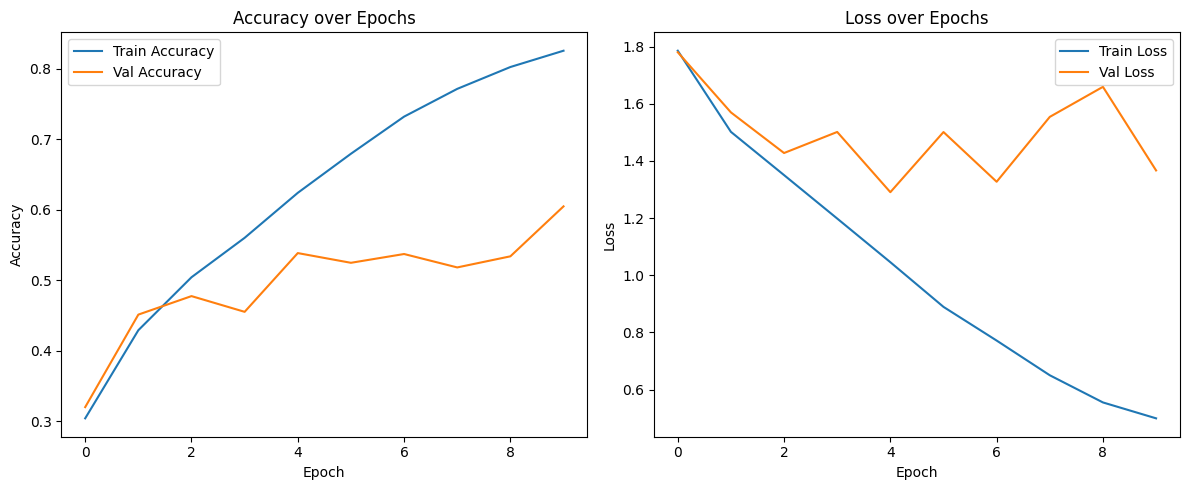

In [23]:
# Evaluate on the val set; display suitable metrics
val_loss, val_accuracy = model.evaluate(X_val, y_val, verbose=1)
print(f"Validation Loss: {val_loss * 100:.2f}%")
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

# Plot accuracy and loss curves
def plot_training_history(history):
    plt.figure(figsize=(12, 5))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Accuracy over Epochs')
    plt.legend()

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss over Epochs')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_training_history(history)




## **4. Data Augmentation** <font color=red> [optional] </font><br>

#### **4.1 Create a Data Augmentation Pipeline**

##### **4.1.1**
Define augmentation steps for the datasets.

In [24]:
# Define augmentation steps to augment images

from tensorflow import keras
from tensorflow.keras import layers

data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomFlip("vertical"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2)
])


Augment and resample the images.
In case of class imbalance, you can also perform adequate undersampling on the majority class and augment those images to ensure consistency in the input datasets for both classes.

Augment the images.

In [25]:
# Create a function to augment the images

def augment_images(images):
    augmented_images = []
    for img in images:
        img = tf.expand_dims(img, axis=0)  # Add batch dimension: (H, W, C) -> (1, H, W, C)
        augmented_img = data_augmentation(img)
        augmented_img = tf.squeeze(augmented_img, axis=0)  # Remove batch dimension back: (1, H, W, C) -> (H, W, C)
        augmented_images.append(augmented_img)
    return np.array(augmented_images)  # Convert the list to a numpy array


# add a batch dimension to the images which are tensor in nature
# def augment_images(images):
#     augmented_images = []
#     for img in images:
#         augmented_img = data_augmentation(img)
#         augmented_images.append(augmented_img)
#     return np.array(augmented_images)  # Convert the list to a numpy array


In [26]:
# Create the augmented training dataset
X_train_augmented = augment_images(X_train)
X_train_final = np.concatenate([X_train, X_train_augmented], axis=0)
y_train_final = np.concatenate([y_train, y_train], axis=0)
print(X_train_final.shape, y_train_final.shape)


(12200, 128, 128, 3) (12200, 7)


##### **4.1.2**

Train the model on the new augmented dataset.

In [ ]:
# Train the model using augmented images
epoch = 10
batch_size = 32
history_dict = {}
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()
callbacks=[EarlyStopping(monitor='val_loss',patience=3),
           ModelCheckpoint("best_model.h5",save_best_only=True)
           ]
history = model.fit(
    X_train_final, y_train_final,
    epochs=epoch,
    batch_size=batch_size,
    validation_split=0.2,
    callbacks=callbacks
    )

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)              │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 126, 126, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 61, 61, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 61, 61, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 28, 28, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 28, 28, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 12, 12, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 4, 4, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 4, 4, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 318,183 (1.21 MB)

 Trainable params: 317,415 (1.21 MB)

 Non-trainable params: 768 (3.00 KB)

In [27]:
# 1. Normalize test data (important if X_train was normalized)
X_test= X_val/255.0

# 2. Load the best saved model (optional but good practice)
model = keras.models.load_model('best_model.h5')

# 3. Evaluate on test data
test_loss, test_accuracy = model.evaluate(X_test, y_val, verbose=2)

print(f"\nTest Accuracy after augmentation: {test_accuracy * 100:.2f}%")
print(f"Test Loss after augmentation: {test_loss:.4f}")


48/48 - 1s - 25ms/step - accuracy: 0.3010 - loss: 3.5476

Test Accuracy after augmentation: 30.10%
Test Loss after augmentation: 3.5476


## **5. Conclusions** <font color = red> [5 marks]</font>

#### **5.1 Conclude with outcomes and insights gained** <font color =red> [5 marks] </font>

* Report your findings about the data
* Report model training results



*   Applied Proper Data Augumentation
*   Proper Data Splitting
*   Optimaization of Training Process with Proper Hyperparameter tuning
*   Evaluation on Validation Set






*   Data augmentation is a powerful tool, It prevents overfitting.
*  Splitting the dataset into training, validation,is very important for providing a more accurate measure of its performance.
*Stratified splitting ensures that the distribution of class labels is preserved across the different sets, which is especially important in imbalanced datasets. This prevents the model from being biased towards more frequent classes.

Model Selection and Hyperparameter Tuning:

Using early stopping and saving the best model based on validation performance ensures that we don't end up with an overfitted or underperforming model. It's important to continuously assess the model's performance during training.

Evaluation on Unseen Data is Critical:

Evaluating the model on the test set ensures that we aren't just measuring how well the model memorizes the training data, but how well it generalizes to new, unseen data. This is key in

